<h1>Credit Card Fraud Classification</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


<h3>Exploratory Data Analysis</h3>

In [8]:
# determiner nombre de cas de fraude dans l'ensemble de données
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
fraction = len(fraud)/float(len(valid))

print(fraction)
print("Fraud Casses: {}".format(len(df[df['Class']==1])))
print("Valid Casses: {}".format(len(df[df['Class']==0])))


0.0017304750013189597
Fraud Casses: 492
Valid Casses: 284315


><p> L'ensemble de données est très déséquilibré, car la proportion (fraction) de cas frauduleux (class 1) est très faible <strong>(environ 0.17%)</strong>.</p><p>En raison de ce déséquilibre, il est important de choisir des mesures d'évaluation appropriées (precision, recall, F1-score) plutôt que accuracy lors de l'évaluation des performances de classification model.</p>

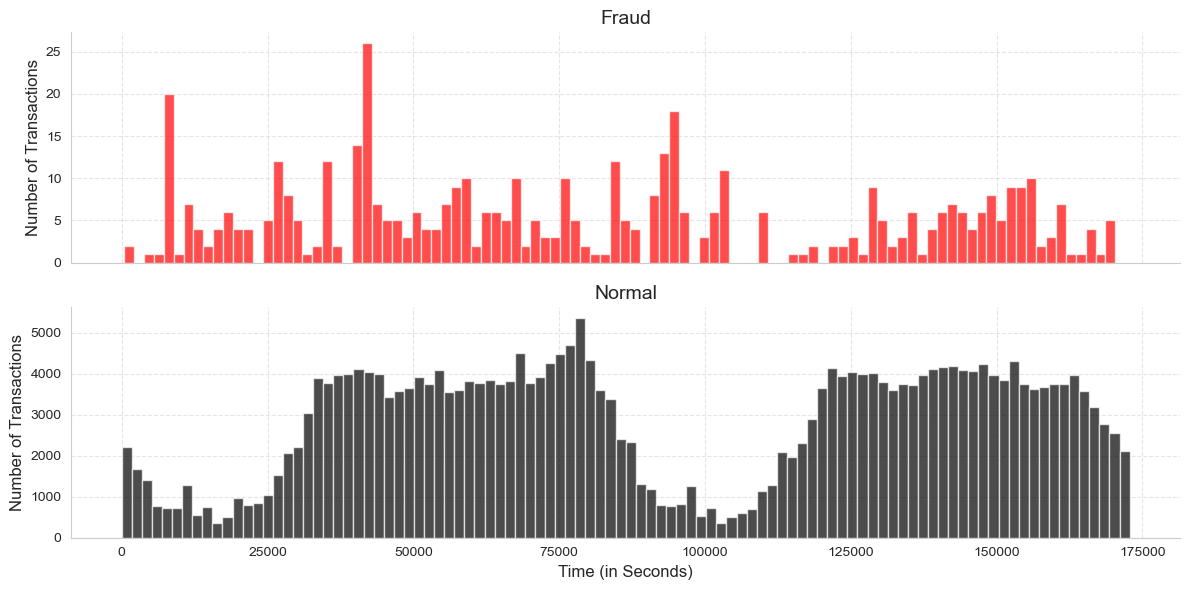

In [9]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

bins = 100

# Plotting for Fraud transactions
ax1.hist(df.Time[df.Class == 1], bins=bins, color='red', alpha=0.7)
ax1.set_title('Fraud', fontsize=14)
ax1.set_ylabel('Number of Transactions', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)
# Plotting for Normal transactions
ax2.hist(df.Time[df.Class == 0], bins=bins, color='black', alpha=0.7)
ax2.set_title('Normal', fontsize=14)
ax2.set_xlabel('Time (in Seconds)', fontsize=12)
ax2.set_ylabel('Number of Transactions', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)

# Remove top and right spines
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

><p>L'histogramme rouge représente les transactions frauduleuses. L'axe des x indique le temps en secondes, et l'axe des y représente le nombre de transactions. Les transactions frauduleuses sont relativement rares par rapport aux transactions normales, comme le montrent les valeurs plus basses sur l'axe des y.</p><p>L'histogramme noir représente les transactions normales qui ont un volume plus élevé. Le motif ici est plus cohérent, avec ce qui semble être un motif cyclique suggérant des volumes de transactions plus élevés à des intervalles réguliers.</p>

In [10]:
# Nombre de détails pour les transactions frauduleuses 
print("Amount of details for the Fraudulent Transaction")
fraud.Amount.describe()

Amount of details for the Fraudulent Transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
# Nombre de détails pour les transactions normales
print("Amount of details for Normal Transaction")
valid.Amount.describe()

Amount of details for Normal Transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

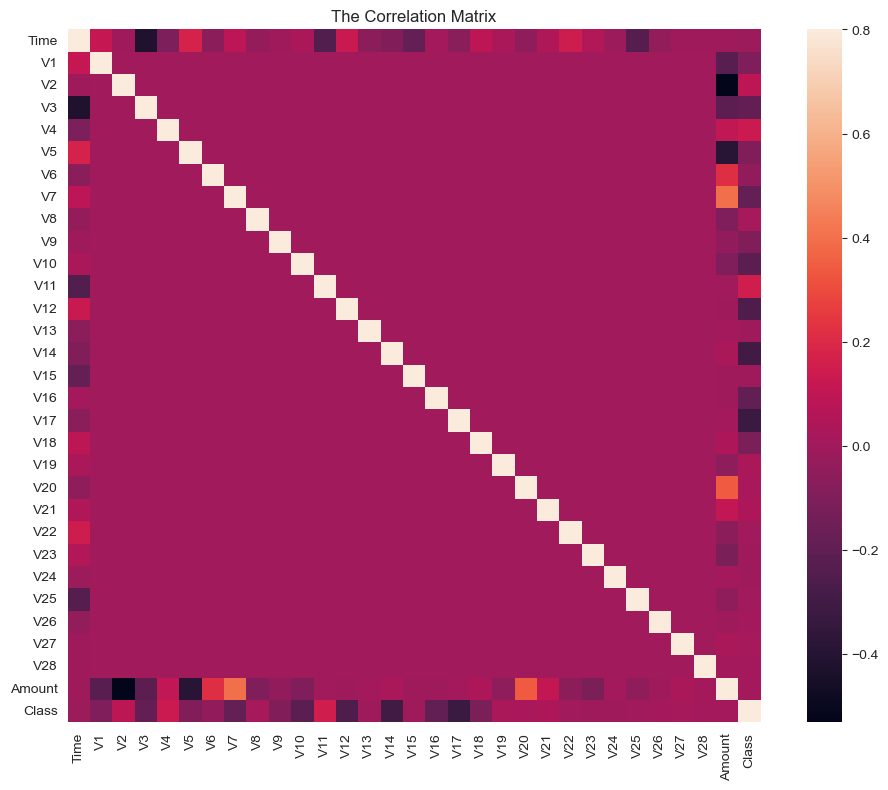

In [12]:
# Tracer la matrice de corrélation
corrmat = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.title("The Correlation Matrix")
plt.show()

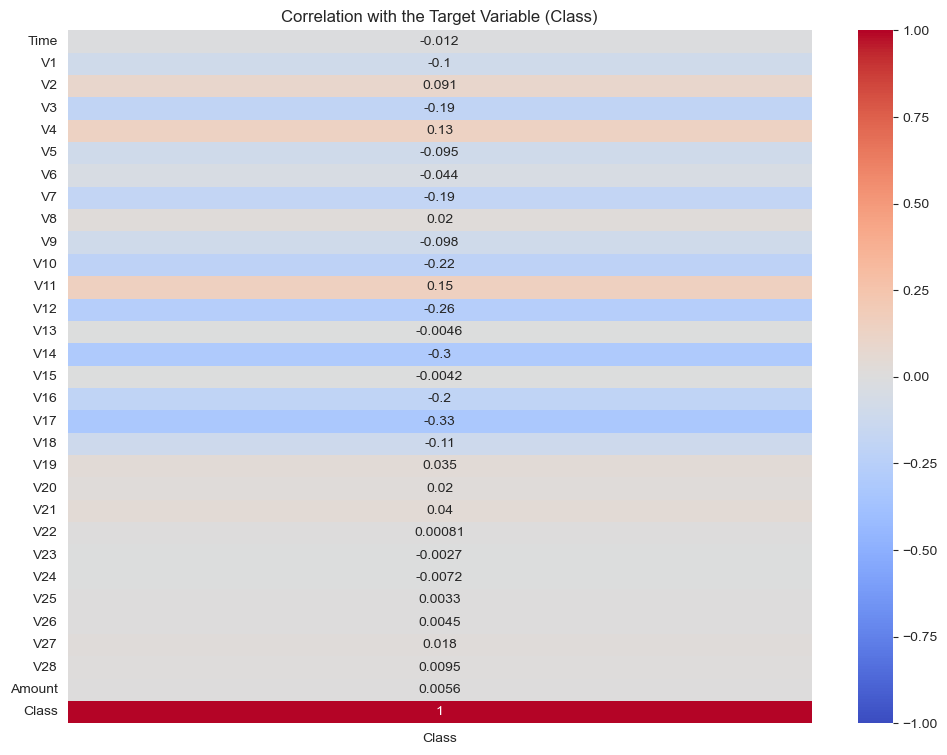

In [13]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr()[['Class']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation with the Target Variable (Class)")
plt.show()


<h3>Model Development</h3>

In [14]:
# Diviser X et Y à partir de dataset
# feature X
X = df.drop(['Class'], axis=1)
# target variable
y = df['Class']

print(X.shape)
print(y.shape)

X_credit = X.values
Y_credit = y.values

(284807, 30)
(284807,)


In [15]:
# Diviser l'ensemble de données en ensembles de formation et de test.
# La répartition est effectuée avec une taille de 20% et l'état aléatoire est fixé à 42 pour des raisons de reproductibilité
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

<h3>Model Evaluation</h3>

<h4>Modèle classification linéaire Logistic Regression</h4>

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [19]:
# training accuracy
lr.score(X_train, y_train)

0.999188044503939

In [20]:
# testing accuracy
lr.score(X_test, y_test)

0.9989115550718023

In [21]:
# prédire sur le test set
y_pred=lr.predict(X_test)

In [22]:
# Evaluer classifier metrics
n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()
print("The model used is LogisticRegression")

# Exactitude
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy is {acc}")

# Précision
prec = precision_score(y_test, y_pred)
print(f"The precision score is {prec}")

# Rappel
rec = recall_score(y_test, y_pred)
print(f"The recall score is {rec}")

# F1-score
f1 = f1_score(y_test, y_pred)
print(f"The f1 score is {f1}")


The model used is LogisticRegression
The accuracy is 0.9989115550718023
The precision score is 0.7903225806451613
The recall score is 0.5
The f1 score is 0.6125


><p>Le modèle de regresssion logistique a atteint une grande précision sur les ensembles de formation et de test, indiquant une bonne généralisation. Cependant, la précision n'est peut-être pas la meilleure mesure pour des ensembles de données déséquilibrés comme la détection des fraudes.</p><p><strong>Le score de précision</strong> est la proportion de véritables prédictions positives parmi toutes les prédictions positives. Dans ce cas, il est de 0.79, ce qui suggère que <strong>lorsque le modèle prédit une fraude, il est correct dans envrion 79% des cas</strong></p><p><strong>Le score de rappel</strong> est la proportion de véritables prédictions positives parmi toutes les instances positives réelles. Dans ce cas, il est de 0.5, ce qui indique que <strong>le modèle capture 50% de cas de fraude réels.</strong> -> Les performances du modèle en matière de rappel pourraient être améliorées, car il est crucial d'identifier autant de cas frauduleux que possible.</p><p><strong>Le score F1</strong> est la moyenne harmonique de précision et de rappel. Il offre un équilibre entre précision et rappel. Ici, c'est 0.6125.</p><p>En conclusion, le modèle de régression logistique montre des résultats prometteurs, mais des ajustements supplémentaires et une prise en compte du déséquilibre des classes pourraient améliorer ses performances, notamment en termes de rappel pour la détection des fraudes.</p>

<h3>Metrics</h3>

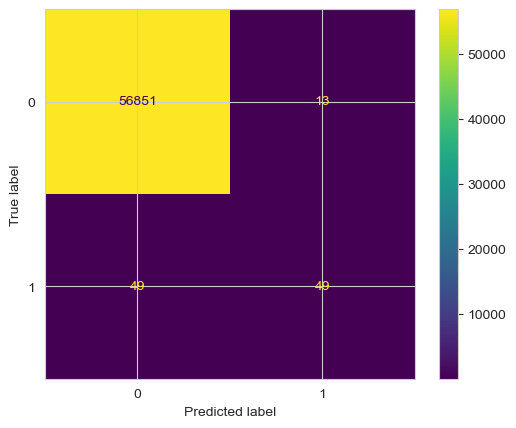

In [23]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()

><p><strong>La matrice de confusion: </strong>L'objectif de la détection des fraudes est souvent de minimiser les faux négatifs (cas dans lesquels la fraude réelle n'est pas détectée). Un bon modèle aurait un taux de vrais positifs élevé (capture de la fraude) et un faible taux de faux négatifs.</p><p><strong>Vrais Positifs(TP): </strong>Il s'agit des cas où le modèle a correctement prédit la fraude(Class 1). Ils sont représentés dans le quadrant supérieur gauche de la matrice.( 56851)</p><p><strong>Vrais Négatifs(TN): </strong>Ce sont les cas où le modèle a correctement prédit la non-fraude(Class 0). Ils sont représentés dans le quafrant inférieur droit de la matrice.(49)</p><p><strong>Faux Possitifs(FP): </strong>Il s'agit des cas où le modèle a prédit de manière incorrecte une fraud alors qu'il s'agissait en réalité d'une non-fraude. Ils se trouvent dans le quadrant supérieur droit de la matrice.(13)</p><p><strong>Faux Négatifs: </strong>Il s'agit des cas où le modèle a prédit tort une non-fraude alors qu'il s'agissait en réalité d'une fraude. Ils se trouvent dans le quadrant inférieur gauche de la matrice.(49)</p>